基於mnist數據集，建立mlp模型，實現0-9數字的十分類task:
1. 實現mnist數據載入，可視化圖形數字
1. 完成數據預處理：圖像數據維度轉換與歸一化、輸出結果格式轉換
1. 計算模型在預測數據集的準確率
1. 模型結構：兩層隱藏層，每層有392個神經元

In [1]:
# load the mnist data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


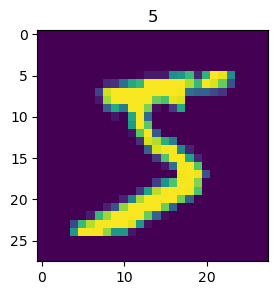

In [3]:
# visualize the data
img1 = X_train[0]
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [4]:
img1.shape

(28, 28)

In [5]:
#fromat the input data
feature_size = img1.shape[0] * img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)

print(X_train_format.shape)

(60000, 784)


In [6]:
# normalize the input data
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255

print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
# format the output data(labels)
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)

print(y_train[0]) # 5
print(y_train_format[0]) # 在下標為5 的地方為1

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


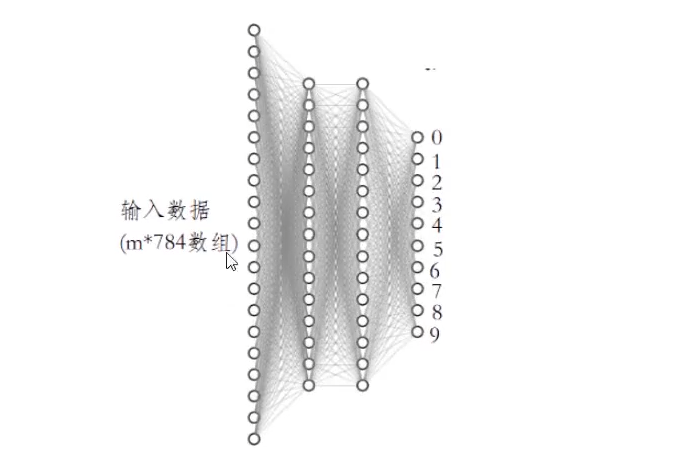

In [8]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp = Sequential()
mlp.add(Dense(units=392,activation='sigmoid',input_dim=feature_size)) # 第一層
mlp.add(Dense(units=392,activation='sigmoid')) # 第二層
mlp.add(Dense(units=10,activation='softmax')) # 輸出層
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
# comfigure the model
mlp.compile(loss='categorical_crossentropy',optimizer='adam')

In [10]:
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3419
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1439
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0934
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0637
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0481
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0353
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0272
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0204
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0160
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0133


In [11]:
import numpy as np

In [12]:
# evaluate the model
# y_train_predict = mlp.predict_classes(X_train_normal) # tensorflow2.6 后沒有predict_classes()

# y_train_predict = np.around(mlp.predict(X_train_normal))# 用np.around(mlp.predict()代替, [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train_predict = np.argmax(mlp.predict(X_train_normal), 1) # np.argmax()獲取對應整數, [5 0 4 ... 5 6 8]
print(y_train_predict)

1875/1875 [==============================] - 3s 1ms/step
[5 0 4 ... 5 6 8]


In [13]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9970666666666667


In [14]:
y_test_predict = np.argmax(mlp.predict(X_test_normal), 1)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

313/313 [==============================] - 0s 1ms/step
0.98


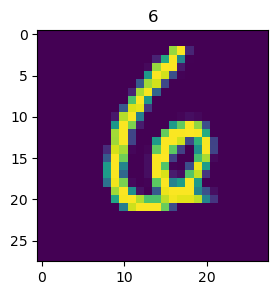

In [15]:
img2 = X_test[123]
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[123])
plt.show()

圖像數字多分類實戰summary:
1. 通過mlp模型，實現了基於圖像數據的數字自動識別分類
2. 完成了圖像的數字化處理與可視化
1. 對mlp模型的輸入、輸出數據格式有了更深的認識，完成了數據預處理與格式轉換
1. 建立了結構更爲複雜的mlp模型
1. mnist數據集地址：http://yann.lecun.com/exdb/mnist/